### 공부시간과 과외 횟수에 따른 점수 예측하기
- 목표 : 공부시간과 과외횟수가 가지는 패턴/규칙을 찾아서 점수를 예측
- 데이터셋 : 임의로 생성
- 피쳐/속성 : 공부시간, 과외횟수
- 타겟/라벨 : 점수
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : 선형회귀 <== [조건] 데이터분포가 선형 분포여야함!

[1] 데이터 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 14개씩 데이터셋
hours = [1,3,4,5,7,9,11]
jumsu = [32,55,89,70,99,92,100]
lesson = [0,0,2,1,2,0,1]

In [3]:
# List => DataFrame로 변환, Series로 변환

hourDF = pd.DataFrame(hours, columns=['Hour'])
lessonDF = pd.DataFrame(lesson, columns=['Lesson'])

jumsuSR = pd.Series(jumsu)

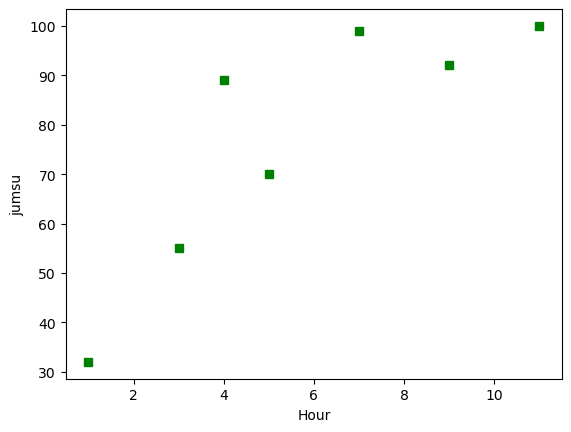

In [4]:
# 데이터 분포 확인
plt.plot(hourDF, jumsuSR, 'gs')
plt.xlabel('Hour')
plt.ylabel('jumsu')
plt.show()

In [5]:
# 피쳐와 타겟
features=pd.DataFrame({'Hour':hours, 'lesson':lesson})
target=pd.Series(jumsu)

[2] 학습 진행 - 다중 선형 회귀

In [6]:
# 모듈 로딩
from sklearn.linear_model import LinearRegression

In [7]:
# 학습 모델 인스턴스 생성
model = LinearRegression()

In [8]:
# 학습 진행
model.fit(features, target)

LinearRegression()

In [9]:
# 학습 후 모델 파라미터
print(f'기울기 : {len(model.coef_)}개 : {model.coef_}')
print(f'절편 : {model.intercept_}')

기울기 : 2개 : [ 5.52333333 13.42333333]
절편 : 33.64666666666668


In [10]:
# y=ax+bx+c
pre_jumsu = model.coef_[0]*hourDF+model.coef_[1]*hourDF+model.intercept_
pre_jumsu=pre_jumsu.values.reshape(-1)

In [11]:
# 실제 점수와 예측 점수의 차이 확인
real_jumsu = jumsuSR.to_numpy()
real_jumsu - pre_jumsu

array([ -20.59333333,  -35.48666667,  -20.43333333,  -58.38      ,
        -67.27333333, -112.16666667, -142.06      ])

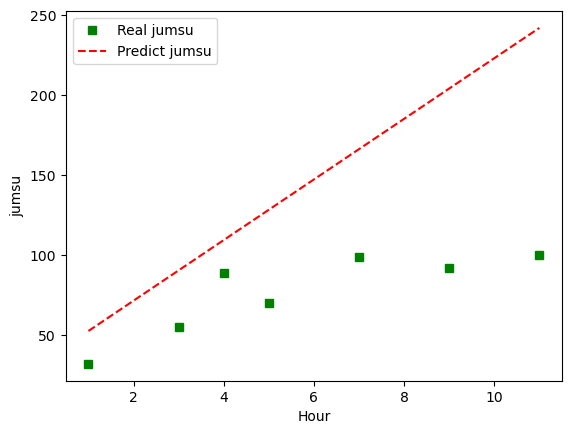

In [12]:
# 현재 데이터의 분포 확인

plt.plot(hourDF, jumsuSR, 'gs', label='Real jumsu')
plt.plot(hourDF, pre_jumsu, 'r--', label='Predict jumsu')
plt.xlabel('Hour')
plt.ylabel('jumsu')
plt.legend()
plt.show()

[3] 모델 성능 평가

In [13]:
### 모듈 로딩, 손실/비용함수로 오차 계산, 결정계수
### root_mean_squared_error는 v.1.4 이상

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
# 점수 => 내부에서 predict() 진행 ==> 결과로 R2 계수 추출해서 반환
score = model.score(features, target)
print(f'score: {score}')

score: 0.9306058408277729


In [17]:
# 성능지표 => 오차계산과 결정계수 계산
pre_target = model.predict(features)
pre_target

array([ 39.17      ,  50.21666667,  82.58666667,  74.68666667,
        99.15666667,  83.35666667, 107.82666667])

In [19]:
# 손실/비율 계산 함수 ==> 정답과 예측값 : 0에 가까울수록 좋음
mse=mean_squared_error(target, pre_target)
rmse=mean_squared_error(target, pre_target, squared=False)
mae=mean_absolute_error(target, pre_target)

# 얼마나 정답에 가깝게 값을 예측했느냐를 나타내는 지표, ==> 정답과 예측값 제공 : 1에 가까울수록 좋음
r2=r2_score(target, pre_target)

## 손실/비용함수 값은 0에 가까울수록
## 결정계수 값은 1에 가까울수록 성능 좋은 모델

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

MSE: 39.053333333333356
RMSE: 6.2492666236393974
MAE: 5.66857142857143
R2: 0.9306058408277729
